# 第三章 精炼预测


## 3.1 讨论：怎样的收益率预测模型是好的模型？

我们一再强调，收益率预测更接近艺术。但我们还是要讨论一下，怎样的收益率预测模型是好的模型。
为更接近问题的核心，我们就上一章的例子，提出下列问题。

### 3.1.1 问题一：

我们先来思考第一个问题：我们把出现“红三兵”时，记它的预期收益率为1%，未出现时记为0，
那么，这个1%是怎么算出来的？
要解决这个问题很简单，我们把过去出现“红三兵”之后，股票第二天的收益率记录下来，求个均值即可。

### 3.1.2 问题二：

那么问题又来了，我们是在做主动管理，所有预测都是基于一致预期收益的，
即我们要预测的是超出一致预期的收益，这个和我们学过的超额收益不同，我们姑且将其叫做超常收益。
这样，刚才的算法可能就需要调整一些，应该记录每次“红三兵”之后的超常收益，然后求个均值。

### 3.1.3 问题三：

问题又来了，对于不同股票，出现“红三兵”之后的超常收益，可能分布不同——
有些股票可能超常收益的标准差大，有些股票可能超常收益的标准差小，这又怎么办呢？
一般来说，我们很会把其中$\beta$的成分去掉，高$\beta$的股票自然超常收益的标准差大，
我们去掉这个因素后，各股票的超常收益分布接近多了。

### 3.1.4 问题四：

自然，还有新的问题：不同行业的股票，大概也有上述不同吧。
这个要处理就太复杂了，但也可以用类似的方法处理。

### 3.1.5 问题五：

再来看，在牛市中，如果所有股票都出现“红三兵”，
那么出现“红三兵”的股票就并不比指数走得好，这个不合逻辑。
解决方案通常是：如果一共有N只股票，其中m只出现“红三兵”，
那么出现“红三兵”的，预测超常收益率为(N - m)%，未出现的为m%，
这样，倒是实现了平衡，但还要按照刚才计算的超常收益的标准差来标准化一下。

### 3.1.6 问题六：

再来想一个问题，既然“红三兵”能赚钱，那对称地，“绿三兵”呢？
在股票市场上，这个往往要谨慎，因为我国做空机制不够完善，涨跌并不对称。
那是不是大宗商品的期货市场上，就可以对称来做呢？
期货市场上，做短期波动的策略，可以假设涨跌是对称的。
但如果做长期策略，则并不然，大宗商品的需求的增减，往往变动比较慢，
几乎可以认为是不变的，供给方面，如果供给过剩，
在整个产业链上，了解信息的人是相当多的，
而且对过剩供给的消耗也是非常持久的，故熊市一半比较长。
而如果供给是短缺的，那么往往各种天灾人祸意外事故都会导致价格暴涨，
所以商品牛市往往也比较短暂。
这就意味着，大宗商品的长期涨跌也是不对称的。
所以，我们要根据情况，判断要不要把“红三兵”和“绿三兵”融和成一个信号。

### 3.1.7 问题七：

那么问题又来了，怎么判断“红三兵”是否有效呢？
我们可以把出现“红三兵”的股票选出来，持有20天，看看收益。

### 3.1.8 问题八：

但是这样又引入了新的问题，我为什么是持有20天而不是持有30天？
索性，干脆只持有1天？或者再加入点止损条件？这样就更复杂了。
我们要研究这个入场点好不好，就应该控制变量，根本不要引入任何出场参数。
所以，我们就考察持有1天。

### 3.1.9 问题九：

那么，我们考察持有1天的什么？超常收益？夏普比？信息比？收益回撤比？胜率？
另外，因为前面的讨论，每次出现“红三兵”时，我们对未来的预测都不同了。
那么，对于一个连续的预测，怎么评价预测准不准？
最简单的做法是计算预测和实现的超常收益的相关系数。

### 3.1.10 问题十：

那问题又来了，相关系数也有好多种算法。
其核心在于，我预测的2%和预测的1%，事实上可能并不是2倍的关系。
那么，是否应该按某种方式再次将预测标准化呢？是，读者可以想想该怎么做。

### 3.1.11 问题十一：

接下来，我们回到为什么只考察1天这个问题。
我们先思考一下，如果今天出现“红三兵”，
我买了后一直持有，次日的平均收益、第三日的的平均收益、第n日的平均收益，
是否会有一定的数学关系？
很显然，它会衰减，但怎么衰减？
一种合理的想法是指数衰减，因为指数衰减有无记忆性，并且只有一个参数。
如果是这样，我只需要考察第1天和第2天，一方面求出上述参数，
一方面求出首日的预测收益，那后面的收益都能推出来了。
但事实上，通过历史数据研究发现，它并非完全的指数衰减，
这里面可研究的东西很多。

### 3.1.12 问题十二：

再有，如果短期内连续出现两次“红三兵”，预测收益是否加倍？
这就要考虑到红三兵这个信号本身的自相关性了。
如果自相关性高，预测收益大体应该是不变的；
如果自相关性低，那么预测收益翻倍好像也没什么问题。
这自相关性究竟如何影响，也有很多可以研究的东西。

### 3.1.13 结论：

以上，我们提出了很多问题。我们可以很确定的说，没考虑这些问题的预测，
一定不是好的预测。全部考虑了这些问题的预测，也难说孰优孰劣。
这就真的进入艺术的领域了。

本章，我们将一起，直面上述问题，采用业界通行的办法来精炼预测。
我们将采用第二章所找到的预测因子——“红三兵”，将其预测进行精炼。

## 3.2 基础知识回顾

我们上一章中提到的预测——“红三兵”实际上是我们获取信息的原始形式。
由于原始的信息千奇百怪，我们无法把它和其他信息结合起来使用，也无法把它直接用于对收益率的预测。
在本章中，我们会把原始预测转化为精炼预测，它与我们要预测的收益率具有相同的单位和量级，
具有相似的统计特性，尽可能地暴露出原始预测中所含有地信息量。

经过严格地数学推导，我们可以得到基于预测而对主动收益率的最小方差无偏估计：
$$\alpha = \mathbf{Cov}[r, g] \cdot \mathbf{Var}^{-1}[g] \cdot (g - \mathbf{E}[g])$$
其中，r是预测标的的主动收益率，g是我们的原始预测。

然后，我们经过不那么严谨的简化，可以得到简化表达式，也就是我们在本章中的核心脉络：
$$\alpha = \omega \cdot IC \cdot z$$
其中$\omega$是标的主动收益率的标准差，IC是信息系数，定义为原始预测和标的主动收益率的相关系数，z是原始预测的标准化形式，均值为0，标准差为1。

下面，我们将以此为脉络开展我们的实验，以求出精炼预测$\alpha$。

## 3.3 操作总览

本实验由以下几个步骤组成：
1. 步骤一：重构并优化“红三兵”
2. 步骤二：信号标准化
3. 步骤三：计算信息系数IC
4. 步骤四：计算精炼预测$\alpha$

## 3.4 操作流程

### 3.4.0 准备工作

我们每一章的代码都是可以独立运行的，所以在开始之前，我们需要做一些准备工作：

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

import tushare as ts
import numpy as np

在获取股票数据时，我们采用TuShare提供的最新的方法：

In [2]:
stock_list = ts.get_sz50s().code
stock_data = {}
for stock in stock_list:
    stock_data[stock] = ts.get_k_data(stock, start='2017-01-01', end='2017-12-31')
stock_data['600000'].head()

D:\Anaconda\lib\site-packages\tushare\stock\classifying.py:266: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  ct.PAGES['sz50b']), parse_cols=[0, 4, 5])


,date,open,close,high,low,volume,code
0,2017-01-03,12.184,12.251,12.356,12.153,162371.0,600000
1,2017-01-04,12.244,12.274,12.289,12.161,296587.0,600000
2,2017-01-05,12.251,12.251,12.311,12.206,264376.0,600000
3,2017-01-06,12.251,12.161,12.251,12.123,171955.0,600000
4,2017-01-09,12.206,12.176,12.244,12.123,149087.0,600000


同样的，我们获取上证50指数（000016）的数据：

In [5]:
index_name = '000016'
index_data = ts.get_k_data(index_name, index=True, start='2017-01-01', end='2017-12-31') #上证50指数 的6个数据
print(index_data.head())
print(len(index_data))

         date     open    close     high      low      volume      code
0  2017-01-03  2285.27  2307.89  2311.29  2285.27  25908920.0  sh000016
1  2017-01-04  2305.91  2322.21  2324.56  2304.17  26104403.0  sh000016
2  2017-01-05  2322.42  2322.68  2326.18  2317.89  26528712.0  sh000016
3  2017-01-06  2323.01  2308.94  2326.43  2308.37  26445124.0  sh000016
4  2017-01-09  2308.44  2318.34  2321.69  2307.16  26523074.0  sh000016
244


In [6]:
#print(index_data.date)

我们把所有股票的开盘价，做在一个DataFrame里，最高价、最低价、收盘价等同理，这样可以方便我们计算并增加新的因子。

In [7]:
##################              再研究
stock_0 = pd.DataFrame(index=index_data.date)    # 用日期作为index
stock_na = pd.DataFrame(index=index_data.date)
stock_open = stock_0.copy()
stock_high = stock_0.copy()
stock_low = stock_0.copy()
stock_close = stock_0.copy()

for stock in stock_list:
    stock_0 = stock_0.join(pd.DataFrame(0.0, index=stock_data[stock].date, columns=[stock]))
    stock_na = stock_na.join(pd.DataFrame(stock_data[stock].open.isna().values, index=stock_data[stock].date, columns=[stock]))
    stock_open = stock_open.join(pd.DataFrame(stock_data[stock].open.values, index=stock_data[stock].date, columns=[stock]))
    stock_high = stock_high.join(pd.DataFrame(stock_data[stock].high.values, index=stock_data[stock].date, columns=[stock]))
    stock_low = stock_low.join(pd.DataFrame(stock_data[stock].low.values, index=stock_data[stock].date, columns=[stock]))
    stock_close = stock_close.join(pd.DataFrame(stock_data[stock].close.values, index=stock_data[stock].date, columns=[stock]))

有了这些基础数据，我们可以计算收益率：

In [8]:
stock_rtn = stock_0.copy()
for stock in stock_list:
    stock_rtn[stock] = stock_close[stock] / stock_close[stock].shift() - 1  # shift 是下一行的
stock_rtn = stock_rtn.fillna(0)                  # 将None的替换为0
print(stock_rtn.head())

              600000    600016    600019    600028    600029    600030  \
date                                                                     
2017-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-04  0.001877  0.000000  0.018987  0.010919  0.010069  0.001810   
2017-01-05 -0.001874 -0.003179  0.001511  0.032403  0.008379 -0.004323   
2017-01-06 -0.007346 -0.007765  0.020114  0.020924 -0.001433 -0.008619   
2017-01-09  0.001233  0.001118  0.004436 -0.001740  0.004304  0.003726   

              600036    600048    600050    600104    ...       601766  \
date                                                  ...                
2017-01-03  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
2017-01-04  0.003329  0.002197 -0.001350  0.016723    ...     0.010162   
2017-01-05  0.004444 -0.002192  0.055135 -0.009850    ...    -0.004087   
2017-01-06 -0.007728 -0.003353 -0.020364 -0.005830    ...     0.004104   
2017-01-09 -0.001070  0.002204  0.003

### 3.4.1 步骤一：重构并优化“红三兵”

我们之前的“红三兵”判定程序，为帮助大家更好的理解，相对比较冗长。而且它仅适用于之前的股票数据格式。故我们需要重构并优化其判定函数，并计算出它对每只股票主动收益率的初步预测值。其中，主动收益率指组合/股票的收益率于基准的收益率之差。下同。

In [9]:
def cal_rtn_predictor_r3s():
    #初始化返回值
    res = stock_0.copy().fillna(0)
    #计算每只股票的预测值
    for stock in stock_list:
        #计算每日的预测值
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():
                #剔除近三日有停牌的股票
                res[stock][i] = 0.0
            else:
                o = stock_open[stock][idx].copy()
                c = stock_close[stock][idx].copy()
                h = stock_high[stock][idx].copy()
                l = stock_low[stock][idx].copy()
                r = stock_rtn[stock][idx].copy()
                os = o.shift(-1)
                #计算
                d = (r > 0).sum()
                dd = (r < 0).sum()
                #近三日中有两日以上上涨
                if d > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os > o).sum() + (os < c).sum()
                    #计算惩罚函数
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看涨，预测收益率
                        res[stock][i] = 0.05 - loss
                #近三日中有两日以上没有上涨
                if dd > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os < o).sum() + (os > c).sum()
                    #计算惩罚函数
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看跌，预测收益率
                        res[stock][i] = -0.05 + loss
    return res

rtn_predictor_r3s = cal_rtn_predictor_r3s()
print(rtn_predictor_r3s.tail())

              600000    600016    600019    600028    600029    600030  \
date                                                                     
2017-12-25  0.000000  0.000000  0.000000  0.021357  0.007925  0.002324   
2017-12-26 -0.001897 -0.006176 -0.006219  0.022476  0.000000  0.000000   
2017-12-27 -0.003942  0.004850  0.014178  0.011625  0.000000  0.000000   
2017-12-28 -0.001340  0.004464  0.014224  0.020637  0.000000  0.002657   
2017-12-29 -0.001386  0.000000  0.004428  0.003891  0.005548  0.000000   

              600036    600048  600050    600104    ...       601766  \
date                                                ...                
2017-12-25  0.004816  0.000000     0.0  0.023626    ...    -0.000771   
2017-12-26  0.000000  0.000000     0.0  0.000000    ...     0.000000   
2017-12-27  0.000000  0.000000     0.0  0.000000    ...     0.000000   
2017-12-28  0.000000  0.001599     0.0 -0.009598    ...     0.000000   
2017-12-29  0.000000  0.000000     0.0  0.000000 

这里，我们大幅调整了“红三兵”的算法：
1. 对称地增加了“绿三兵”；
2. 把“连续三根阳线”做成惩罚条件，如果只有两根阳线，也有可能选入；
3. 把“每日开盘价在上日k线实体之内”做成惩罚条件，稍有不满足，也有可能选入；
4. 把“每根阳线差不多等长”做成惩罚条件，以收益率的标准差来衡量；
5. 把“收盘价接近最高价”做成惩罚条件， 以二者偏离率的标准差来衡量。
6. 以5%减去上述惩罚项得到预测收益率。

尽管我们进行了优化，但仍有值得改进的地方。比如，上涨下跌真的对称吗？
我们的惩罚条件中，不同惩罚项的设计纯属拍脑袋决定的，怎样找出最优设计？
请读者自行设计更优的惩罚函数，使得“红三兵”的算法看起来更好，作为课堂练习：

# 作业四

In [44]:
#更好的“红三兵”算法，请写在这里：
# 改进：对惩罚函数的各个部分进行标准化  消除本身波动性的影响
import numpy as np
def cal_rtn_predictor_r3s_new():
    #初始化返回值
    res = stock_0.copy().fillna(0)
    #改进： 计算各个股票的均值标准差  为标准化做准备
    o1,o2 = np.mean(stock_open.fillna(0)),np.std(stock_open.fillna(0))
    h1,h2 = np.mean(stock_high.fillna(0)),np.std(stock_high.fillna(0))
    l1,l2 = np.mean(stock_low.fillna(0)),np.std(stock_low.fillna(0))
    c1,c2 = np.mean(stock_close.fillna(0)),np.std(stock_close.fillna(0))
    r1,r2 = np.mean(stock_rtn.fillna(0)),np.std(stock_rtn.fillna(0))
    
    #计算每只股票的预测值
    for stock in stock_list:
        #计算每日的预测值
        for i in range(2, len(stock_0)):
            idx = list(range(i - 2, i + 1))      
            if stock_na[stock][idx].sum():     # 用idx对天进行遍历
                #剔除近三日有停牌的股票
                res[stock][i] = 0.0
            # 改进：计算标准化变量
            else:
                o = (stock_open[stock][idx].copy()-o1[stock])/o2[stock]
                c = (stock_close[stock][idx].copy()-c1[stock])/c2[stock]
                h = (stock_high[stock][idx].copy()-h1[stock])/h2[stock]
                l = (stock_low[stock][idx].copy()-l1[stock])/l2[stock]
                r = (stock_rtn[stock][idx].copy()-r1[stock])/r2[stock]
                os = o.shift(-1)
                #计算
                rr = stock_rtn[stock][idx].copy()
                d = (rr > 0).sum()
                dd = (rr < 0).sum()
                #近三日中有两日以上上涨
                if d > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os > o).sum() + (os < c).sum()
                    #计算惩罚函数
                    loss = (c / h - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看涨，预测收益率
                        res[stock][i] = 0.05 - loss
                #近三日中有两日以上没有上涨
                if dd > 0:
                    #每日开盘是否在上日K线实体之内
                    in_entity = (os < o).sum() + (os > c).sum()
                    #计算惩罚函数
                    loss = (c / l - 1).std() + r.std() + (3 - d) / 100 + (4 - in_entity) / 100
                    if loss < 0.05:
                        #看跌，预测收益率
                        res[stock][i] = -0.05 + loss
    return res

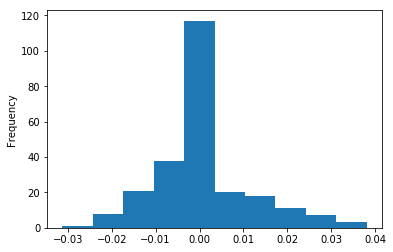

In [12]:
rtn_predictor_r3s['600000'].plot('hist')   # 看一下预测收益率的分布情况

In [14]:
print(type(stock_open['600000']))

<class 'pandas.core.series.Series'>


In [19]:
# 计算各个股票的均值标准差  为标准化做准备
o1,o2 = np.mean(stock_open.fillna(0)),np.std(stock_open.fillna(0))
h1,h2 = np.mean(stock_high.fillna(0)),np.std(stock_high.fillna(0))
l1,l2 = np.mean(stock_low.fillna(0)),np.std(stock_low.fillna(0))
c1,c2 = np.mean(stock_close.fillna(0)),np.std(stock_close.fillna(0))

In [25]:
o1['600000']   # series 中单个股票的均值

12.438848360655724

### 3.4.2 步骤二：预测标准化

接下来，我们需要把我们的预测标准化。
标准化的方法很多：
1. 算法：
    1. 减均值，再除以标准差
    2. 利用正态分位数，把预测映射为正态分布
    3. 利用S型函数，把预测极化
2. 数据：
    1. 利用时间序列数据，每只股票分别标准化
    2. 利用截面数据，每日分别标准化
    3. 利用面板数据，统一标准化
    
我们先采用相对简单的方法：使用面板数据，直接使用减均值再除以标准差的方法，统一进行标准化：

In [9]:
z_r3s = (rtn_predictor_r3s - rtn_predictor_r3s.values.mean()) / rtn_predictor_r3s.values.std()
print(z_r3s.tail())

              600000    600016    600019    600028    600029    600030  \
date                                                                     
2017-12-25 -0.295747 -0.295747 -0.295747  1.802180  0.482707 -0.067420   
2017-12-26 -0.482056 -0.902401 -0.906617  1.912060 -0.295747 -0.295747   
2017-12-27 -0.682921  0.180664  1.096953  0.846219 -0.295747 -0.295747   
2017-12-28 -0.427391  0.142711  1.101450  1.731461 -0.295747 -0.034783   
2017-12-29 -0.431913 -0.295747  0.139258  0.086484  0.249197 -0.295747   

              600036    600048    600050    600104    ...       601688  \
date                                                  ...                
2017-12-25  0.177295 -0.295747 -0.295747  2.024998    ...    -0.295747   
2017-12-26 -0.295747 -0.295747 -0.295747 -0.295747    ...    -0.295747   
2017-12-27 -0.295747 -0.295747 -0.295747 -0.295747    ...    -0.295747   
2017-12-28 -0.295747 -0.138679 -0.295747 -1.238582    ...    -0.295747   
2017-12-29 -0.295747 -0.295747 -0.295

通过上面算法，我们得出了标准化的预测。但是，细心的读者会发现，我们之前对于无看法的预测，或者停牌的股票，都给的0预测，现在减去均值之后，它们都变成-0.55了，这一点有违常理。而且，我们计算均值和标准差的数据，都是同期的数据，照理说应该用预测的数据，我们实际上是犯了使用未来数据的错误。那么增样修正呢？

1. 首先，我们使用二阶原点矩来替代方差（二阶中心矩）；
2. 计算均值绝不能使用未来数据，其实，直接假定均值为0也是合理的；
3. 计算标准差时，使用未来数据影响不大，毕竟波动率是有聚集效应的。严谨起见，应使用上年数据计算标准差，但我们选取近似算法，直接使用当年数据。

In [10]:
z_r3s = rtn_predictor_r3s / rtn_predictor_r3s.values.std()
print(z_r3s.tail())

              600000    600016    600019    600028    600029    600030  \
date                                                                     
2017-12-25  0.000000  0.000000  0.000000  2.097927  0.778454  0.228327   
2017-12-26 -0.186309 -0.606654 -0.610870  2.207807  0.000000  0.000000   
2017-12-27 -0.387174  0.476411  1.392700  1.141966  0.000000  0.000000   
2017-12-28 -0.131644  0.438458  1.397197  2.027208  0.000000  0.260964   
2017-12-29 -0.136166  0.000000  0.435005  0.382231  0.544944  0.000000   

              600036    600048  600050    600104    ...       601688  \
date                                                ...                
2017-12-25  0.473042  0.000000     0.0  2.320745    ...     0.000000   
2017-12-26  0.000000  0.000000     0.0  0.000000    ...     0.000000   
2017-12-27  0.000000  0.000000     0.0  0.000000    ...     0.000000   
2017-12-28  0.000000  0.157068     0.0 -0.942835    ...     0.000000   
2017-12-29  0.000000  0.000000     0.0  0.000000 

我们给读者留一个课堂练习：使用S型函数，利用极化的方式来标准化预测。

注：常见的S型函数是：
$$f(x) = \frac{1}{1 - e^{-b(x - a)}}$$

In [45]:
#print(rtn_predictor_r3s)  # 原始的预测收益率  为dataframe

# 作业五

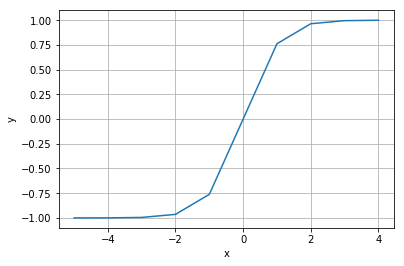

In [72]:
#利用S型函数来标准化预测
# 构造s型函数
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5)    # 设定范围
y = 2/ (1 + math.e**-(2*x))-1
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.plot(x,y)

In [81]:
#利用S型函数来标准化预测
import math    
def sigmoid(x):
    return 2/ (1 + math.e**-(2*x))-1  # mathematically equivalent, but simpler    #  Sigmoid function

In [87]:
#z_r3s = (rtn_predictor_r3s - rtn_predictor_r3s.values.mean()) / rtn_predictor_r3s.values.std()
z_r3sss =sigmoid(1000*rtn_predictor_r3s)
print(z_r3sss.tail()) 

              600000    600016    600019    600028   600029    600030  \
date                                                                    
2017-12-25  0.000000  0.000000  0.000000  1.000000  1.00000  0.981036   
2017-12-26 -0.955950 -0.999991 -0.999992  1.000000  0.00000  0.000000   
2017-12-27 -0.999246  0.999877  1.000000  1.000000  0.00000  0.000000   
2017-12-28 -0.871711  0.999735  1.000000  1.000000  0.00000  0.990197   
2017-12-29 -0.882331  0.000000  0.999715  0.999166  0.99997  0.000000   

              600036    600048  600050  600104    ...       601688    601766  \
date                                              ...                          
2017-12-25  0.999869  0.000000     0.0     1.0    ...     0.000000 -0.647799   
2017-12-26  0.000000  0.000000     0.0     0.0    ...     0.000000  0.000000   
2017-12-27  0.000000  0.000000     0.0     0.0    ...     0.000000  0.000000   
2017-12-28  0.000000  0.921515     0.0    -1.0    ...     0.000000  0.000000   
2017-12-

### 3.4.3 步骤三：计算信息系数IC

接下来，我们要计算信息系数IC。其定义式为：
$$IC = \mathbf{Corr}[r, g]$$
其中，g是我们对主动收益率的标准化预测，r则是实现的主动收益率。

我们刚才已经算出了g，那么，现在，我们来计算r，首先，我们来整理关于指数的数据：

In [31]:
index_0 = pd.DataFrame(0.0, index=index_data.date, columns=[index_name])
index_open = pd.DataFrame(index_data.open.values, index=index_data.date, columns=[index_name])
index_high = pd.DataFrame(index_data.high.values, index=index_data.date, columns=[index_name])
index_low = pd.DataFrame(index_data.low.values, index=index_data.date, columns=[index_name])
index_close = pd.DataFrame(index_data.close.values, index=index_data.date, columns=[index_name])
print(index_close.head())

             000016
date               
2017-01-03  2307.89
2017-01-04  2322.21
2017-01-05  2322.68
2017-01-06  2308.94
2017-01-09  2318.34


然后，我们来计算指数的收益率：

In [32]:
index_rtn = index_close / index_close.shift() - 1
index_rtn = index_rtn.fillna(0)
print(index_rtn.head())

              000016
date                
2017-01-03  0.000000
2017-01-04  0.006205
2017-01-05  0.000202
2017-01-06 -0.005916
2017-01-09  0.004071


这样，我们可以计算股票的主动收益率r。为此，我们需要引入一个新的包NumPy:

In [61]:
import numpy as np
stock_active_rtn = stock_rtn - np.repeat(index_rtn.values, stock_rtn.columns.size, axis=1)
print(stock_active_rtn.head())

              600000    600016    600019    600028    600029    600030  \
date                                                                     
2017-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-04 -0.004327 -0.006205  0.012783  0.004714  0.003864 -0.004395   
2017-01-05 -0.002076 -0.003381  0.001308  0.032200  0.008177 -0.004526   
2017-01-06 -0.001431 -0.001849  0.026030  0.026839  0.004483 -0.002703   
2017-01-09 -0.002838 -0.002953  0.000365 -0.005811  0.000233 -0.000345   

              600036    600048    600050    600104    ...       601688  \
date                                                  ...                
2017-01-03  0.000000  0.000000  0.000000  0.000000    ...     0.000000   
2017-01-04 -0.002875 -0.004008 -0.007554  0.010518    ...     0.007550   
2017-01-05  0.004242 -0.002394  0.054933 -0.010053    ...    -0.005096   
2017-01-06 -0.001813  0.002563 -0.014448  0.000085    ...    -0.004981   
2017-01-09 -0.005141 -0.001867 -0.000

这样，我们可以计算出IC：

In [163]:
ic_r3s = np.corrcoef(stock_active_rtn.shift(-1).fillna(0.0).values.reshape(stock_active_rtn.size), z_r3s.values.reshape(z_r3s.size))[0,1]
print(ic_r3s)

0.0211964748412957


在上面的运算中，我们多次用到了NumPy包，我们在此简要介绍一下。

NumPy(Numerical Python)是Python语言的一个扩充程序库。它支持高级大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。
它的核心是ndarray类，前面pandas.DataFrame.values就是返回了numpy.ndarray类型。特别要注意的是，它和Python标准库中的array是不同的。

#### 3.4.3.1 ndarrays入门

ndarray可用list来创建：

In [89]:
x = np.array([[1,2],[3,4]])
print(x)

[[1 2]
 [3 4]]


也可以创建全为0、全为1或空的数组：

In [95]:
print(np.empty((3,2)))
print(np.zeros(10))
print(np.ones((2,3)))

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]]


可以查看数组的基本属性：

In [96]:
print(x.ndim)
print(x.shape)

2
(2, 2)


数组间可以做简单运算：

In [97]:
print(2 * x + 3 * x * x - 1 / x)

[[ 4.         15.5       ]
 [32.66666667 55.75      ]]


#### 3.4.3.2 ndarrays基本操作

可以访问其子数组和元素：

In [99]:
print(x[0])
print(x[0,1])
print(x[:,1])

[1 2]
2
[2 4]


可以改变数组形状：

In [102]:
print(x.reshape(4))
print(x.reshape(1,4))
print(x.reshape(4,1))

[1 2 3 4]
[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


也支持布尔运算和布尔索引：

In [106]:
print(x > 1)
x[x > 1] = -1
print(x)

[[False False]
 [False False]]
[[ 1 -1]
 [-1 -1]]


布尔索引是非常有用的技巧，应多加理解。

#### 3.4.3.3 ndarrays常用函数

##### 3.4.3.3.1 元素级别的函数

这些函数一般是算术运算的函数，作用在数组的元素上：

In [112]:
y = np.array([[1,2],[3,4]])

print("x = ", x)
print("y = ", y)
print("abs(x) = ", np.abs(x))
print("sqrt(y) = ", np.sqrt(y))
print("exp(x) = ", np.exp(x))
print("log(y) = ", np.log(y))
print("sign(x) = ", np.sign(x))

x =  [[ 1 -1]
 [-1 -1]]
y =  [[1 2]
 [3 4]]
abs(x) =  [[1 1]
 [1 1]]
sqrt(y) =  [[1.         1.41421356]
 [1.73205081 2.        ]]
exp(x) =  [[2.71828183 0.36787944]
 [0.36787944 0.36787944]]
log(y) =  [[0.         0.69314718]
 [1.09861229 1.38629436]]
sign(x) =  [[ 1 -1]
 [-1 -1]]


##### 3.4.3.3.2 数组级别的函数

这些函数一般一些统计函数，作用在数组上：

In [115]:
print(y.mean())
print(y.sum())
print(y.std())
print(y.max())
print(y.min())

2.5
10
1.118033988749895
4
1


##### 3.4.3.3.3 集合级别的函数

数组可以看作一个数的集合，这些函数把数组看作集合来进行集合操作：

In [116]:
#去除冗余
print(np.unique(x))
#求交集
print(np.intersect1d(x,y))
#求并集
print(np.union1d(x,y))

[-1  1]
[1]
[-1  1  2  3  4]


##### 3.4.3.3.4 矩阵级别函数

数组可以看作一个矩阵，从而进行线性代数的运算,
这需要导入其线性代数模块：

In [129]:
#   ————————————————————————————矩阵处理——————————————————————————
import numpy.linalg
#矩阵对角线
print(np.diag(y))
#矩阵乘法
print(np.dot(x,y))
#矩阵的迹
print(np.trace(y))
#行列式值
print(np.linalg.det(y))
#矩阵的逆
print(np.linalg.inv(y))
#解线性方程组
print(np.linalg.solve(y, x[0]))

[1 4]
[[-2 -2]
 [-4 -6]]
5
-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[-3.  2.]


##### 3.4.3.3.5 随机数模块

生成随机数的数组需要导入随机数模块：

In [144]:
import numpy.random
#生成正态分布随机数矩阵
print(np.random.normal(size=(4,5)))
#生成均匀分布随机数矩阵
print(np.random.rand(3,2))

[[ 1.32830106  1.05953636  0.33752701  0.8723855   1.6498133 ]
 [ 1.03866841 -0.26586761  0.12618713  0.20389674  0.18195108]
 [ 0.10658654  1.77981304 -3.07683081  1.3238369   0.28000619]
 [ 1.12967376 -1.92276128 -0.93667068  1.90566757  0.23841377]]
[[0.51408146 0.92353027]
 [0.96739165 0.02186313]
 [0.5324598  0.60367591]]


### 3.4.4 步骤四：计算精炼预测$\alpha$

有了前面的铺垫，我们终于可以计算主动收益率的精炼预测$\alpha$了。
它的公式是：
$$\alpha = w \cdot IC \cdot z$$
其中，w是每只股票的波动率，IC是预测值的信息系数，z是标准化的预测。

In [213]:
alpha_r3s = np.repeat(np.array(stock_active_rtn.std()).reshape(1, stock_rtn.columns.size), len(stock_rtn), axis=0) * ic_r3s * z_r3s
print(alpha_r3s.head())

              600000  600016    600019    600028    600029   600030   600036  \
date                                                                           
2017-01-03  0.000000     0.0  0.000000  0.000000  0.000000  0.00000  0.00000   
2017-01-04  0.000000     0.0  0.000000  0.000000  0.000000  0.00000  0.00000   
2017-01-05  0.000480     0.0  0.000646  0.000436  0.000438  0.00035  0.00070   
2017-01-06  0.000045     0.0  0.001139  0.000442  0.000000  0.00000  0.00028   
2017-01-09  0.000000     0.0  0.000984  0.000000  0.000133  0.00000  0.00000   

              600048  600050  600104    ...       601688    601766    601800  \
date                                    ...                                    
2017-01-03  0.000000     0.0     0.0    ...     0.000000  0.000000  0.000000   
2017-01-04  0.000000     0.0     0.0    ...     0.000000  0.000000  0.000000   
2017-01-05  0.000549     0.0     0.0    ...     0.000216  0.000050  0.000729   
2017-01-06  0.000000     0.0     0.0   

## 3.5 结论

迄今为止，我们看似已经得出了对收益率的精炼预测。但这还远远不够，还有很多棘手的问题。我们在后面的章节中，还会继续这个问题。